## Preparing the lab environment

- Create a dataset directory
- download the file to the *datasets* directory

In [1]:
!mkdir datasets

### Download the dataset

In [3]:
!gdown 18Ulneqq0CSsuPPva9F4If-OFJkn7rj4M -O datasets/sigma.zip

Downloading...
From (original): https://drive.google.com/uc?id=18Ulneqq0CSsuPPva9F4If-OFJkn7rj4M
From (redirected): https://drive.google.com/uc?id=18Ulneqq0CSsuPPva9F4If-OFJkn7rj4M&confirm=t&uuid=913b0ece-d4ad-41df-a196-a8704deae8ab
To: /content/datasets/sigma.zip
100% 122M/122M [00:00<00:00, 216MB/s]


In [4]:
ls -al datasets/

total 118852
drwxr-xr-x 2 root root      4096 Mar 23 05:54 ./
drwxr-xr-x 1 root root      4096 Mar 23 05:54 ../
-rw-r--r-- 1 root root 121693383 Mar 23 05:54 sigma.zip


### Unzip the dataset

In [5]:
!unzip datasets/sigma.zip -d datasets/

Archive:  datasets/sigma.zip
  inflating: datasets/train.csv      
  inflating: datasets/sample_submission.csv  
  inflating: datasets/test.csv       


In [ ]:
!ls -al datasets/

total 2916732
drwxr-xr-x 2 root root       4096 Sep 11 04:35 .
drwxr-xr-x 1 root root       4096 Sep 11 04:34 ..
---------- 1 root root   14739065 Sep 11  2018 sample_submission.csv
-rw-r--r-- 1 root root  121693383 Sep 11 04:34 sigma.zip
---------- 1 root root 1346845550 Sep 11  2018 test.csv
---------- 1 root root 1503430926 Sep 11  2018 train.csv


## Benchmarking Various File Formats

- csv
- pickle
- feather
- parquet

### Reading the CSV File

In [6]:
import pandas as pd
import os

In [7]:
%%time

train_df = pd.read_csv("./datasets/train.csv")

<timed exec>:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.


CPU times: user 15.6 s, sys: 1.19 s, total: 16.8 s
Wall time: 17.1 s


In [8]:
train_df.dtypes

channelGrouping         object
date                     int64
device                  object
fullVisitorId           object
geoNetwork              object
sessionId               object
socialEngagementType    object
totals                  object
trafficSource           object
visitId                  int64
visitNumber              int64
visitStartTime           int64
dtype: object

In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 903653 entries, 0 to 903652
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   channelGrouping       903653 non-null  object
 1   date                  903653 non-null  int64 
 2   device                903653 non-null  object
 3   fullVisitorId         903653 non-null  object
 4   geoNetwork            903653 non-null  object
 5   sessionId             903653 non-null  object
 6   socialEngagementType  903653 non-null  object
 7   totals                903653 non-null  object
 8   trafficSource         903653 non-null  object
 9   visitId               903653 non-null  int64 
 10  visitNumber           903653 non-null  int64 
 11  visitStartTime        903653 non-null  int64 
dtypes: int64(4), object(8)
memory usage: 82.7+ MB


In [ ]:
train_df.shape

(903653, 12)

In [ ]:
train_df.head(5)

,channelGrouping,date,device,fullVisitorId,geoNetwork,sessionId,socialEngagementType,totals,trafficSource,visitId,visitNumber,visitStartTime
0,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",1131660440785968503,"{""continent"": ""Asia"", ""subContinent"": ""Western...",1131660440785968503_1472830385,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472830385,1,1472830385
1,Organic Search,20160902,"{""browser"": ""Firefox"", ""browserVersion"": ""not ...",377306020877927890,"{""continent"": ""Oceania"", ""subContinent"": ""Aust...",377306020877927890_1472880147,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472880147,1,1472880147
2,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",3895546263509774583,"{""continent"": ""Europe"", ""subContinent"": ""South...",3895546263509774583_1472865386,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472865386,1,1472865386
3,Organic Search,20160902,"{""browser"": ""UC Browser"", ""browserVersion"": ""n...",4763447161404445595,"{""continent"": ""Asia"", ""subContinent"": ""Southea...",4763447161404445595_1472881213,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472881213,1,1472881213
4,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",27294437909732085,"{""continent"": ""Europe"", ""subContinent"": ""North...",27294437909732085_1472822600,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472822600,2,1472822600


### Optimizing data types

In [10]:
dtypes = {
    "channelGrouping": "str",
    "date": "int16",
    "device": "str",
    "fullVisitorId": "str",
    "geoNetwork": "str",
    "sessionId": "str",
    "socialEngagementType": "str",
    "totals": "str",
    "trafficSource": "str",
    "visitId": "uint16",
    "visitNumber": "int16",
    "visitStartTime": "uint16"
}

In [11]:
train_new_df = pd.read_csv("./datasets/train.csv", dtype = dtypes)

In [12]:
train_new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 903653 entries, 0 to 903652
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   channelGrouping       903653 non-null  object
 1   date                  903653 non-null  int16 
 2   device                903653 non-null  object
 3   fullVisitorId         903653 non-null  object
 4   geoNetwork            903653 non-null  object
 5   sessionId             903653 non-null  object
 6   socialEngagementType  903653 non-null  object
 7   totals                903653 non-null  object
 8   trafficSource         903653 non-null  object
 9   visitId               903653 non-null  uint16
 10  visitNumber           903653 non-null  int16 
 11  visitStartTime        903653 non-null  uint16
dtypes: int16(2), object(8), uint16(2)
memory usage: 62.0+ MB


### Creating other file formats

In [13]:
train_new_df.to_pickle("./datasets/train.pkl")

In [14]:
ls -al datasets/

total 3050192
drwxr-xr-x 2 root root       4096 Mar 23 06:01 ./
drwxr-xr-x 1 root root       4096 Mar 23 05:54 ../
---------- 1 root root   14739065 Sep 11  2018 sample_submission.csv
-rw-r--r-- 1 root root  121693383 Mar 23 05:54 sigma.zip
---------- 1 root root 1346845550 Sep 11  2018 test.csv
---------- 1 root root 1503430926 Sep 11  2018 train.csv
-rw-r--r-- 1 root root  136662990 Mar 23 06:01 train.pkl


In [ ]:
file_size

136818121

In [15]:
train_new_df.to_parquet("./datasets/train.parquet")

In [16]:
!ls -al datasets/

total 3137760
drwxr-xr-x 2 root root       4096 Mar 23 06:02 .
drwxr-xr-x 1 root root       4096 Mar 23 05:54 ..
---------- 1 root root   14739065 Sep 11  2018 sample_submission.csv
-rw-r--r-- 1 root root  121693383 Mar 23 05:54 sigma.zip
---------- 1 root root 1346845550 Sep 11  2018 test.csv
---------- 1 root root 1503430926 Sep 11  2018 train.csv
-rw-r--r-- 1 root root   89669215 Mar 23 06:02 train.parquet
-rw-r--r-- 1 root root  136662990 Mar 23 06:01 train.pkl


In [18]:
train_new_df.to_feather("./datasets/train.feather")

In [19]:
!ls -al datasets/

total 3240904
drwxr-xr-x 2 root root       4096 Mar 23 06:14 .
drwxr-xr-x 1 root root       4096 Mar 23 05:54 ..
---------- 1 root root   14739065 Sep 11  2018 sample_submission.csv
-rw-r--r-- 1 root root  121693383 Mar 23 05:54 sigma.zip
---------- 1 root root 1346845550 Sep 11  2018 test.csv
---------- 1 root root 1503430926 Sep 11  2018 train.csv
-rw-r--r-- 1 root root  105618330 Mar 23 06:14 train.feather
-rw-r--r-- 1 root root   89669215 Mar 23 06:02 train.parquet
-rw-r--r-- 1 root root  136662990 Mar 23 06:01 train.pkl


In [ ]:
### Comparing file sizes

In [ ]:
##file_size = os.path.getsize('d:/file.jpg')

In [20]:
filenames = ['./datasets/train.csv',
             './datasets/train.pkl',
             './datasets/train.feather',
             './datasets/train.parquet']

all_filesizes = [os.path.getsize(f) for f in filenames]

filescompare_df = pd.DataFrame( { "formats" : filenames,
                                  "filesize": all_filesizes})

In [21]:
filescompare_df

,formats,filesize
0,./datasets/train.csv,1503430926
1,./datasets/train.pkl,136662990
2,./datasets/train.feather,105618330
3,./datasets/train.parquet,89669215


In [22]:
import matplotlib.pyplot as plt
import seaborn as sn

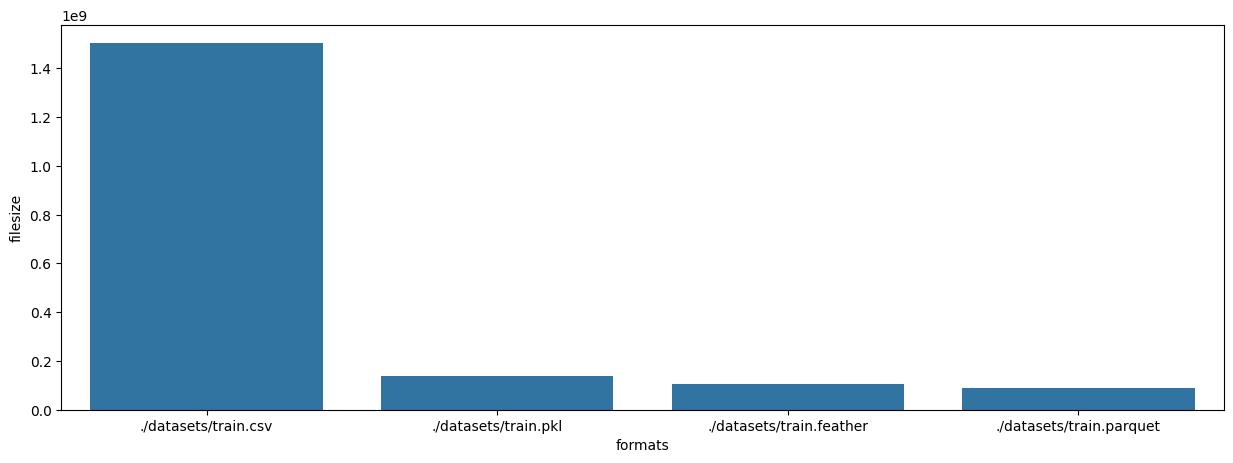

In [23]:
plt.figure( figsize = (15, 5) )
sn.barplot( data = filescompare_df,
           x = 'formats',
           y = 'filesize');

### Read time benchmarking of different formats

In [24]:
%%time

train_pkl_df = pd.read_pickle("./datasets/train.pkl")

CPU times: user 719 ms, sys: 354 ms, total: 1.07 s
Wall time: 3.07 s


In [25]:
%%time

train_feather_df = pd.read_feather("./datasets/train.feather")

CPU times: user 2.14 s, sys: 2.67 s, total: 4.81 s
Wall time: 4.81 s


In [ ]:
train_feather_df.shape

(903653, 12)

In [26]:
%%time

train_parquet_df = pd.read_parquet("./datasets/train.parquet")

CPU times: user 3.14 s, sys: 2.76 s, total: 5.9 s
Wall time: 5.99 s


In [27]:
import time

t1 = time.perf_counter()
train_df = pd.read_csv("./datasets/train.csv")
time_csv = time.perf_counter() - t1

t1 = time.perf_counter()
train_pkl_df = pd.read_pickle("./datasets/train.pkl")
time_pkl = time.perf_counter() - t1

t1 = time.perf_counter()
train_feather_df = pd.read_feather("./datasets/train.feather")
time_feather = time.perf_counter() - t1

t1 = time.perf_counter()
train_parquet_df = pd.read_parquet("./datasets/train.parquet")
time_parquet = time.perf_counter() - t1

<ipython-input-27-c25f037f806d>:4: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv("./datasets/train.csv")


In [28]:
filescompare_df['read_time'] = [time_csv, time_pkl, time_feather, time_parquet]

In [29]:
filescompare_df

,formats,filesize,read_time
0,./datasets/train.csv,1503430926,19.284753
1,./datasets/train.pkl,136662990,1.570238
2,./datasets/train.feather,105618330,4.656160
3,./datasets/train.parquet,89669215,5.751832


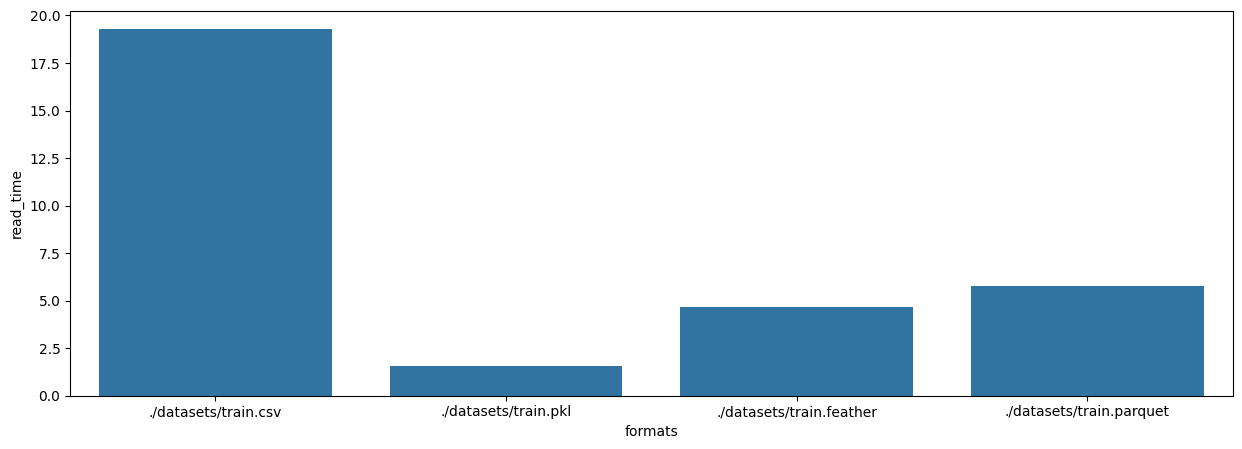

In [30]:
plt.figure( figsize = (15, 5) )
sn.barplot( data = filescompare_df,
           x = 'formats',
           y = 'read_time');

## Frameworks

- datatable (https://datatable.readthedocs.io/en/latest/index.html)
- dask

In [ ]:
!pip install datatable

     |████████████████████████████████| 96.9 MB 101 kB/s 


In [ ]:
import datatable as dt
print(dt.__version__)

1.0.0


In [ ]:
%%time

train_dtable = dt.fread("./datasets/train.csv")

CPU times: user 10.4 s, sys: 1.41 s, total: 11.8 s
Wall time: 6.12 s


In [ ]:
train_df.head(5)

,channelGrouping,date,device,fullVisitorId,geoNetwork,sessionId,socialEngagementType,totals,trafficSource,visitId,visitNumber,visitStartTime
0,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",1131660440785968503,"{""continent"": ""Asia"", ""subContinent"": ""Western...",1131660440785968503_1472830385,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472830385,1,1472830385
1,Organic Search,20160902,"{""browser"": ""Firefox"", ""browserVersion"": ""not ...",377306020877927890,"{""continent"": ""Oceania"", ""subContinent"": ""Aust...",377306020877927890_1472880147,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472880147,1,1472880147
2,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",3895546263509774583,"{""continent"": ""Europe"", ""subContinent"": ""South...",3895546263509774583_1472865386,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472865386,1,1472865386
3,Organic Search,20160902,"{""browser"": ""UC Browser"", ""browserVersion"": ""n...",4763447161404445595,"{""continent"": ""Asia"", ""subContinent"": ""Southea...",4763447161404445595_1472881213,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472881213,1,1472881213
4,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",27294437909732085,"{""continent"": ""Europe"", ""subContinent"": ""North...",27294437909732085_1472822600,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472822600,2,1472822600


In [ ]:
train_dtable_df = train_dtable.to_pandas()

In [ ]:
train_dtable_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 903653 entries, 0 to 903652
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   channelGrouping       903653 non-null  object
 1   date                  903653 non-null  int32 
 2   device                903653 non-null  object
 3   fullVisitorId         903653 non-null  object
 4   geoNetwork            903653 non-null  object
 5   sessionId             903653 non-null  object
 6   socialEngagementType  903653 non-null  object
 7   totals                903653 non-null  object
 8   trafficSource         903653 non-null  object
 9   visitId               903653 non-null  int32 
 10  visitNumber           903653 non-null  int32 
 11  visitStartTime        903653 non-null  int32 
dtypes: int32(4), object(8)
memory usage: 68.9+ MB


In [ ]:
!pip install "dask[complete]"

     |████████████████████████████████| 119 kB 3.0 MB/s 
     |████████████████████████████████| 779 kB 21.3 MB/s 
     |████████████████████████████████| 778 kB 31.5 MB/s 
     |████████████████████████████████| 776 kB 55.8 MB/s 
     |████████████████████████████████| 769 kB 62.8 MB/s 
     |████████████████████████████████| 766 kB 36.1 MB/s 
     |████████████████████████████████| 1.0 MB 29.2 MB/s 
     |████████████████████████████████| 722 kB 44.1 MB/s 
     |████████████████████████████████| 722 kB 13.7 MB/s 
     |████████████████████████████████| 715 kB 44.2 MB/s 
     |████████████████████████████████| 705 kB 45.5 MB/s 
     |████████████████████████████████| 699 kB 46.0 MB/s 
     |████████████████████████████████| 696 kB 41.6 MB/s 
     |████████████████████████████████| 684 kB 45.2 MB/s 
     |████████████████████████████████| 679 kB 41.5 MB/s 
     |████████████████████████████████| 675 kB 50.7 MB/s 
     |████████████████████████████████| 675 kB 63.0 MB/s 
     |█████████

In [ ]:
import pandas as pd
import dask.dataframe as dd

In [ ]:
%%time

train_dask_df = dd.read_parquet("./datasets/train.parquet").compute()

CPU times: user 2.35 s, sys: 1.55 s, total: 3.9 s
Wall time: 3.75 s


In [ ]:
train_dask_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 903653 entries, 0 to 903652
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   channelGrouping       903653 non-null  object
 1   date                  903653 non-null  int64 
 2   device                903653 non-null  object
 3   fullVisitorId         903653 non-null  object
 4   geoNetwork            903653 non-null  object
 5   sessionId             903653 non-null  object
 6   socialEngagementType  903653 non-null  object
 7   totals                903653 non-null  object
 8   trafficSource         903653 non-null  object
 9   visitId               903653 non-null  int32 
 10  visitNumber           903653 non-null  int16 
 11  visitStartTime        903653 non-null  int32 
dtypes: int16(1), int32(2), int64(1), object(8)
memory usage: 70.7+ MB


In [ ]:
train_dask_df.head(5)

,channelGrouping,date,device,fullVisitorId,geoNetwork,sessionId,socialEngagementType,totals,trafficSource,visitId,visitNumber,visitStartTime
0,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",1131660440785968503,"{""continent"": ""Asia"", ""subContinent"": ""Western...",1131660440785968503_1472830385,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472830385,1,1472830385
1,Organic Search,20160902,"{""browser"": ""Firefox"", ""browserVersion"": ""not ...",377306020877927890,"{""continent"": ""Oceania"", ""subContinent"": ""Aust...",377306020877927890_1472880147,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472880147,1,1472880147
2,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",3895546263509774583,"{""continent"": ""Europe"", ""subContinent"": ""South...",3895546263509774583_1472865386,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472865386,1,1472865386
3,Organic Search,20160902,"{""browser"": ""UC Browser"", ""browserVersion"": ""n...",4763447161404445595,"{""continent"": ""Asia"", ""subContinent"": ""Southea...",4763447161404445595_1472881213,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472881213,1,1472881213
4,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",27294437909732085,"{""continent"": ""Europe"", ""subContinent"": ""North...",27294437909732085_1472822600,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472822600,2,1472822600


In [ ]:
train_dask_df.shape

(903653, 12)

In [ ]:
train_dask_df.channelGrouping.unique()

array(['Organic Search', 'Referral', 'Paid Search', 'Affiliates',
       'Direct', 'Display', 'Social', '(Other)'], dtype=object)